### Import Libraries

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [9]:
# load the dataset into a dataframe
df = pd.read_csv("fraud_train.csv")


# Show the first few rows of the data
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### Normalizaion and data preprocessing of the dataset

In [10]:
# remove unnecessary columns
df.drop(columns=["Unnamed: 0", "trans_date_trans_time", "first", "last", "street", "city", "state", "zip", "dob", "trans_num", "unix_time","job"], inplace=True)

# handle missing values
df.fillna(df.mean(), inplace=True)

# convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=["gender", "merchant", "category"])



# Min-max scaling ( scales the values to a range of 0 to 1)
df_encoded = df
numerical_columns = ['amt','city_pop']
df_encoded[numerical_columns] = (df_encoded[numerical_columns] - df_encoded[numerical_columns].min()) / (df_encoded[numerical_columns].max() - df_encoded[numerical_columns].min())

df[numerical_columns] = df_encoded[numerical_columns]



C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_22200\4073933118.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [11]:
# split the dataset into training and testing sets
X = df.drop(columns=["is_fraud"])
y = df["is_fraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



### Train and Test data using random forest algorithm

In [12]:
# instantiate a random forest classifier
rf = RandomForestClassifier(n_estimators=90, random_state=80, min_samples_leaf=1)

# fit the random forest classifier on the training data
rf.fit(X_train, y_train)

# make predictions on the test data using the fitted model
y_pred = rf.predict(X_test)

# evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Accuracy: 0.9955
Precision: 0.9560439560439561
Recall: 0.5780730897009967
F1 score: 0.7204968944099379


### Plot the decision tree for the first tree in the forest

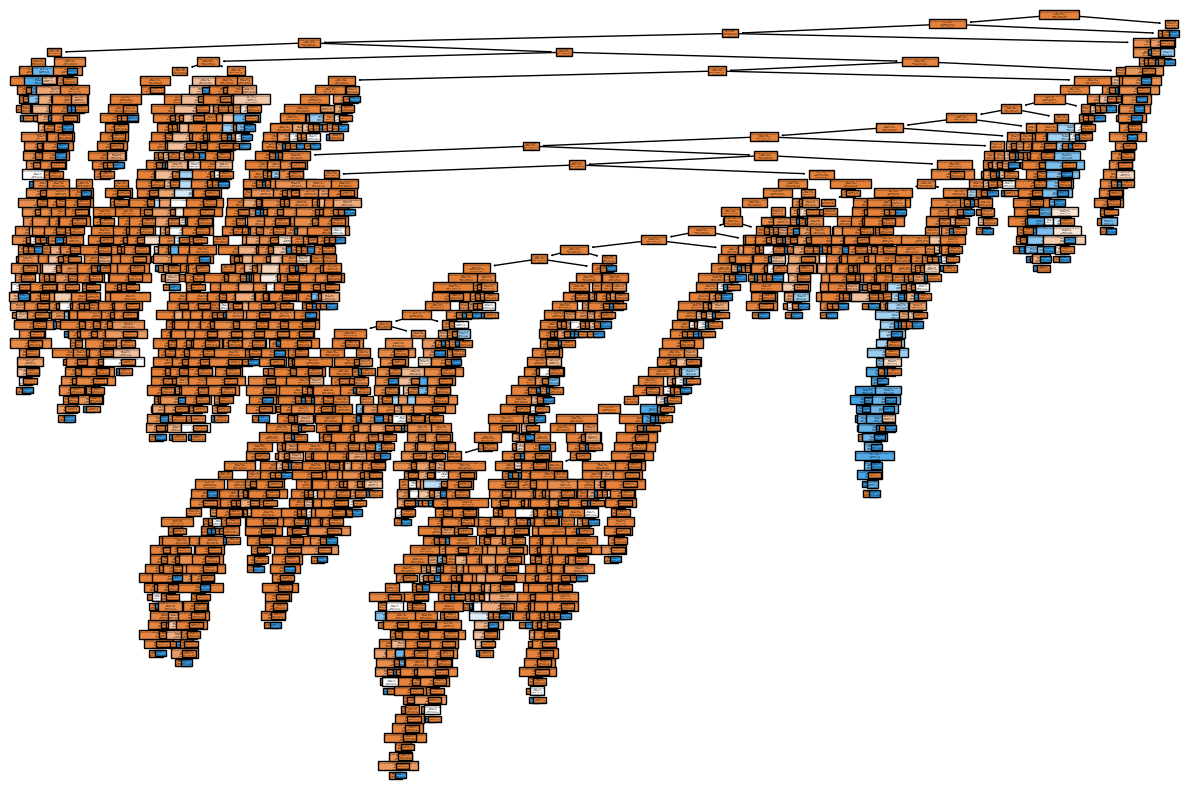

In [13]:
plt.figure(figsize=(15,10))
plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=['Not Fraud', 'Fraud'], filled=True)
plt.show()

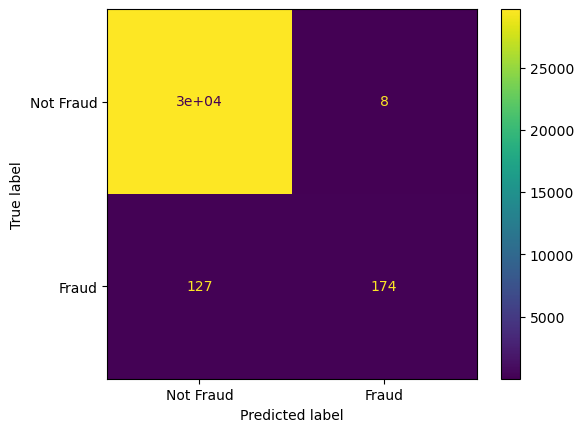

In [14]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot()
plt.show()